# Data Cookbook

This notebook serves as a guide for how to perform some basic data science tasks.

## Recipe 1: Scraping data from the web

This recipe will show how to take data stored on the web and store it in a structured way in code. Specifically, we will be obtaining data on the fastest times to solve a Rubik's Cube blindfolded, from [this website](https://www.worldcubeassociation.org/results/rankings/333bf/average). We will show two ways to do this, one with requests and Beautiful Soup, and the other with Pandas.

In [4]:
# option 1: use requests and beautiful soup to get the page html
import requests
from bs4 import BeautifulSoup

url = 'https://www.worldcubeassociation.org/results/rankings/333bf/average'
response = requests.get(url)
response

<Response [200]>

In [8]:
#  create a BeautifulSoup object from plain html text
soup = BeautifulSoup(response.text)
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <script type="text/javascript">
   window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"43326a088c","applicationID":"10385163","transactionName":"dFheEERaWFwHFE1AVURCXBBFGkZRDA0LXFdE","queueTime":0,"applicationTime":53,"agent":""}
  </script>
  <script type="text/javascript">
   (window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"43326a088c",applicationID:"10385163"};;/*! For license information please see nr-loader-rum-1.240.0.min.js.LICENSE.txt */
(()=>{"use strict";var e,t,n={5763:(e,t,n)=>{n.d(t,{P_:()=>g,Mt:()=>h,C5:()=>s,DL:()=>b,OP:()=>j,lF:()=>k,Yu:()=>w,Dg:()=>p,CX:()=>c,GE:()=>y,sU:()=>T});var r=n(8632),i=n(9567);const a={beacon:r.ce.beacon,errorBeacon:r.ce.errorBeacon,licenseKey:void 0,applicationID:void 0,sa:void 0,queueTime:void 0,applicationTime:void 0,ttGuid:void 0,user:void 0,account:void 0,product:void 0,extr

When parsing HTML, it is often helpful to understand the page structure as much as possible before diving into it programatically. When using google chrome, I find that the developer tools (right click -> inspect) are a great way to quickly navigate your way through the page's HTML code, helping you narrow down exactly what you want to extract.

In [12]:
# in our case, the data is stored inside of a table, so we retrieve them from the BeautifulSoup object
tables = soup.find_all('table')
len(tables)

1

In [20]:
# once we have the table object we want, we can iteratre through its rows ('tr' tags) and items ('td' tags)
results_table = tables[0]
col_names = [th.get_text().strip() for th in results_table.find_all('th')]
data = []
for row in results_table.find_all('tr'):
    data_row = [td.get_text().strip() for td in row.find_all('td')]
    # skip empty rows
    if data_row:
        data.append(data_row)
data

[['1',
  'Tommy Cherry',
  '14.15',
  'United States',
  'WCA World Championship 2023',
  '14.07',
  '13.98',
  '14.39',
  '',
  '',
  ''],
 ['2',
  'Elliott Kobelansky',
  '15.05',
  'Canada',
  'Panthers Cube Day 2023',
  '15.29',
  '14.15',
  '15.70',
  '',
  '',
  ''],
 ['3',
  'Charlie Eggins',
  '15.51',
  'Australia',
  'Side N Blind Narre Warren 2023',
  '16.26',
  '15.60',
  '14.66',
  '',
  '',
  ''],
 ['4',
  'Manuel Gutman',
  '16.22',
  'Argentina',
  'Nacionales Argentinas 2023',
  '16.30',
  '16.71',
  '15.66',
  '',
  '',
  ''],
 ['5',
  'Stanley Chapel',
  '16.29',
  'United States',
  'CubingUSA Nationals 2023',
  '17.61',
  '15.21',
  '16.05',
  '',
  '',
  ''],
 ['6',
  'Gianfranco Huanqui',
  '17.04',
  'Peru',
  'Speedsolving Geekcuber 2023',
  '16.15',
  '18.60',
  '16.37',
  '',
  '',
  ''],
 ['7',
  'Yifan Wang (王逸帆)',
  '17.17',
  'China',
  'WCA World Championship 2023',
  '14.99',
  '19.97',
  '16.54',
  '',
  '',
  ''],
 ['8',
  'Jakob Gunnarsson',
  '17.67

In [21]:
# option 2: use pandas' read_html method for getting data from a webpage's table
import pandas as pd

# this method returns a list of dataframes for all tables, so we concatenate them together to get one large dataframe
df = pd.concat(pd.read_html(url))
df.head()

,#,Name,Result,Representing,Competition,Solves,Solves.1,Solves.2,Solves.3,Solves.4,Unnamed: 10
0,1,Tommy Cherry,14.15,United States,WCA World Championship 2023,14.07,13.98,14.39,NaN,NaN,NaN
1,2,Elliott Kobelansky,15.05,Canada,Panthers Cube Day 2023,15.29,14.15,15.70,NaN,NaN,NaN
2,3,Charlie Eggins,15.51,Australia,Side N Blind Narre Warren 2023,16.26,15.60,14.66,NaN,NaN,NaN
3,4,Manuel Gutman,16.22,Argentina,Nacionales Argentinas 2023,16.30,16.71,15.66,NaN,NaN,NaN
4,5,Stanley Chapel,16.29,United States,CubingUSA Nationals 2023,17.61,15.21,16.05,NaN,NaN,NaN


Looking at the code examples above, it can be tempting to say that the Pandas method is much faster and easier, so should always be used. However, it worked well in this case since our data was very well structured on the web page in a table. For scraping data from web pages that are less structured, the pandas approach won't work nearly as well, and the parsing the HTML yourself might be the only option.

## Recipe 2: Adding summary statistics to a dataframe

We now have a dataframe that contains a lot of the information that we want, but we can add more. We see that the main "result" field in the data is the mean of three different solves, it would be interesting to look at these three solves and see if there are patterns between solvers and standard deviation, min, and max times.

In [30]:
# start by getting a subset of the data containing just the solve times
solves_df = df[['Solves', 'Solves.1', 'Solves.2']]
# use axis=1 to calculate statistics among values across a row rather than down a column
df['Standard Deviation'] = solves_df.std(axis=1)
df['Fastest Time'] = solves_df.min(axis=1)
df['Slowest Time'] = solves_df.max(axis=1)
df

,#,Name,Result,Representing,Competition,Solves,Solves.1,Solves.2,Solves.3,Solves.4,Unnamed: 10,Standard Deviation,Fastest Time,Slowest Time
0,1,Tommy Cherry,14.15,United States,WCA World Championship 2023,14.07,13.98,14.39,NaN,NaN,NaN,0.215484,13.98,14.39
1,2,Elliott Kobelansky,15.05,Canada,Panthers Cube Day 2023,15.29,14.15,15.70,NaN,NaN,NaN,0.803140,14.15,15.70
2,3,Charlie Eggins,15.51,Australia,Side N Blind Narre Warren 2023,16.26,15.60,14.66,NaN,NaN,NaN,0.804073,14.66,16.26
3,4,Manuel Gutman,16.22,Argentina,Nacionales Argentinas 2023,16.30,16.71,15.66,NaN,NaN,NaN,0.529182,15.66,16.71
4,5,Stanley Chapel,16.29,United States,CubingUSA Nationals 2023,17.61,15.21,16.05,NaN,NaN,NaN,1.217867,15.21,17.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Sreeram Venkatarao,26.73,United States,Dixon Winter 2016,25.84,25.19,29.16,NaN,NaN,NaN,2.129390,25.19,29.16
96,97,Dominik Kobinski,26.74,Poland,Cube4fun DÄ browa GÃ³rnicza 2022,28.09,25.22,26.90,NaN,NaN,NaN,1.441955,25.22,28.09
97,98,Artyom Martirosov,26.77,Russia,YJ Fest 2018,31.55,23.88,24.88,NaN,NaN,NaN,4.169688,23.88,31.55
98,99,Oliver Fritz,26.93,Germany,RNSEA 2023,31.45,25.76,23.59,NaN,NaN,NaN,4.059240,23.59,31.45


## Recipe 3: Plotting dataframe columns with matplotlib

We now have some extra statistics on each person in the dataset, but the numbers by themselves can be difficult to work with. Visualizations can help to quickly make things easier to understand and show patterns that can be hidden in raw data.

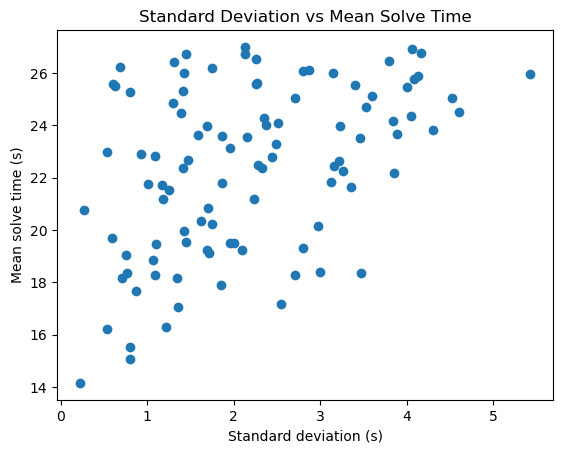

In [35]:
from matplotlib import pyplot as plt

# Matplotlib has many different functions for different types of graphs. I find it quite useful to look at the documentation when doing more than very basic stuff.
# The documentation for the scatter plot method can be found here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(df['Standard Deviation'], df['Result'])
plt.title('Standard Deviation vs Mean Solve Time')
plt.xlabel('Standard deviation (s)')
plt.ylabel('Mean solve time (s)')
plt.show()

Looking at the scatterplot above, we can see a slight positive correlation between the standard deviation in a person's times and their mean solve time. What's interesting is that it appears that having a low standard deviation doesn't necessarily mean you have a fast average time, but having a high standard deviation seems to prevent you from having a fast average time.

## Recipe 4: Merging two dataframes

Often in data science, we'll have two different data sets that are related in some way, and may contain some of the same entities within them. In these situations, it can be helpful to merge the datasets into one. There are a few different ways to do this with Pandas dataframes, but we'll be focusing on the inner merge, which takes entities present in both dataframes and puts them in a new one. For more information on the different types of merges and theory behind them, I find it useful to research SQL joins.

In [36]:
# we'll begin by getting a second dataset, the top single times in blindfolded solving, rather than the top average times.
single_times_url = 'https://www.worldcubeassociation.org/results/rankings/333bf/single'
single_times_df = pd.concat(pd.read_html(single_times_url))
single_times_df.head()

,#,Name,Result,Representing,Competition,Unnamed: 5
0,1,Tommy Cherry,12.78,United States,4BLD in a Madison Hall 2023,NaN
1,2,Elliott Kobelansky,13.24,Canada,Western Championship 2023,NaN
2,3,Charlie Eggins,13.71,Australia,Please Be Quiet Brisbane 2023,NaN
3,4,Stanley Chapel,14.52,United States,Canadian Championship 2023,NaN
4,5,Gianfranco Huanqui,14.66,Peru,Chosica Cubing Cup 2023,NaN


In [42]:
# the "on" parameter is the key used to match entitnies in the first dataframe to entities in the second. This should be a unique characteristic that is present in both dataframes.
both_df = df.merge(single_times_df, how='inner', on='Name')
both_df.head()

,#_x,Name,Result_x,Representing_x,Competition_x,Solves,Solves.1,Solves.2,Solves.3,Solves.4,Unnamed: 10,Standard Deviation,Fastest Time,Slowest Time,#_y,Result_y,Representing_y,Competition_y,Unnamed: 5
0,1,Tommy Cherry,14.15,United States,WCA World Championship 2023,14.07,13.98,14.39,NaN,NaN,NaN,0.215484,13.98,14.39,1,12.78,United States,4BLD in a Madison Hall 2023,NaN
1,2,Elliott Kobelansky,15.05,Canada,Panthers Cube Day 2023,15.29,14.15,15.70,NaN,NaN,NaN,0.803140,14.15,15.70,2,13.24,Canada,Western Championship 2023,NaN
2,3,Charlie Eggins,15.51,Australia,Side N Blind Narre Warren 2023,16.26,15.60,14.66,NaN,NaN,NaN,0.804073,14.66,16.26,3,13.71,Australia,Please Be Quiet Brisbane 2023,NaN
3,4,Manuel Gutman,16.22,Argentina,Nacionales Argentinas 2023,16.30,16.71,15.66,NaN,NaN,NaN,0.529182,15.66,16.71,16,15.66,Argentina,Nacionales Argentinas 2023,NaN
4,5,Stanley Chapel,16.29,United States,CubingUSA Nationals 2023,17.61,15.21,16.05,NaN,NaN,NaN,1.217867,15.21,17.61,4,14.52,United States,Canadian Championship 2023,NaN


We can see that `both_df` now contains those who were present in both the top average times list and the top single times list. For fields that were present in both dataframes, the ones from the first dataframe got appeneded with a '_x', and those from the second were appended with an '_y'.

Text(0, 0.5, 'Single Time (s)')

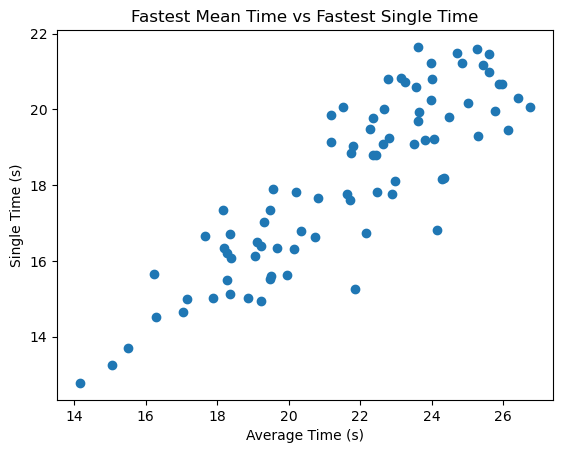

In [43]:
# just for fun, let's make a scatterplot to see if there's a relation between best average time and best single time
plt.scatter(both_df['Result_x'], both_df['Result_y'])
plt.title('Fastest Mean Time vs Fastest Single Time')
plt.xlabel('Average Time (s)')
plt.ylabel('Single Time (s)')

Looking at the graph, we can see a very strong positive correlation between how fast one's best average time is, and how fast one's best single time is.